### Contents
    01. Exporting visualizations
    02. Data checks and preparation
        a. Checking the main dataframe
        b. Checking the departments dataframe
        c. Merging the dataframes
    03. PII issues
    04. Comparing regions
    05. Creating exclusion flag for low-activity customers
    06. Creating customer profiles
        a. Age profile
        b. Income profile
        c. Number of Dependants Profile
        d. Baby stuff Profile
        e. Pet profile
        f. Vegetarian profile
        g. Alcohol drinker Profile 
    07. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
        a. Age profile aggregation
        b. Income profile aggregation
        c. Number of Dependants Profile aggregation
        d. Baby stuff Profile aggregation
        e. Pet profile aggregation
        f. Vegetarian profile aggregation
        g. Alcohol drinker Profile aggregation
    08. Creating visualizations to show the distribution of profiles
        a. Age profile distribution
        b. Income profile distribution
        c. Number of Dependants Profile distribution
        d. Baby stuff Profile distribution
        e. Pet profile distribution
        f. Vegetarian profile distribution
        g. Alcohol drinker Profile distribution
    09. Exporting visualizations

# 01. Importing libraries and data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing data
path= r'C:\Users\Мунаввар\Desktop\bootcamps\Achievement 4\Instacart Basket Analysis'
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_updated.pkl'))
df_departments=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

# 02. Data checks and preparation

### a. Checking the main dataframe

In [3]:
df.shape

(32404859, 32)

In [4]:
df.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   customer_id             int32   
 2   order_number            int8    
 3   order_day_of_week       int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              int32   
 7   add_to_cart_order       int8    
 8   reordered               int8    
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range             object  
 15  busiest_day             object  
 16  busiest_period_of_day   object  
 17  max_order               int8    
 18  loyalty_flag            object  
 19  average_price           float64 
 20  spending_flag           object  
 21  median

### b. Checking the departments dataframe

In [6]:
df_departments.shape

(21, 2)

In [7]:
df_departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [9]:
#Renaming the column
df_departments.rename(columns={'Unnamed: 0':'department_id'}, inplace=True)

In [10]:
#Data type correction for memory saving
df['order_id']=df['order_id'].astype('int32')
df_departments['department_id']=df_departments['department_id'].astype('int8')
df['department_id']=df['department_id'].astype('int8')
df['aisle_id']=df['aisle_id'].astype('int16')
df['average_price']=df['average_price'].astype('float16')
df['prices']=df['prices'].astype('float16')

In [11]:
#Deleting columns for memory saving
df=df.drop(columns=['_merge', 'aisle_id'])

### c. Merging the dataframes

In [12]:
%%time
df_merged=df.merge(df_departments, on='department_id')

CPU times: total: 36.1 s
Wall time: 41.7 s


In [13]:
df_merged.shape

(32404859, 31)

In [14]:
#Deleting df to save memory
del df, df_departments

# 03. PII issues

In [15]:
#Observing the column names in order to detect any PII data
df_merged.columns

Index(['order_id', 'customer_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'price_range', 'busiest_day', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_price', 'spending_flag',
       'median_order_days', 'order_frequency_flag', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'fam_status', 'income', 'department'],
      dtype='object')

#### The columns first_name and  last_name clearly contain PII data and should be removed. We can also remove the  department_id  in order to reduce memory issues.

In [16]:
df_merged=df_merged.drop(columns=['first_name', 'last_name', 'department_id'])

# 04. Comparing regions

In [17]:
#Creating a list of regions 
northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [18]:
#Creating regional flags
df_merged.loc[df_merged['state'].isin(northeast), 'region']='Northeast'
df_merged.loc[df_merged['state'].isin(midwest), 'region']='Midwest'
df_merged.loc[df_merged['state'].isin(south), 'region']='South'
df_merged.loc[df_merged['state'].isin(west), 'region']='West'

In [19]:
#check
df_merged['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [20]:
#Crosstab of region with spending flag
crosstab=pd.crosstab(df_merged['region'], df_merged['spending_flag'],  dropna=False)
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [21]:
#Number of states per region
df_merged.groupby('region')['state'].nunique()

region
Midwest      12
Northeast     9
South        17
West         13
Name: state, dtype: int64

#### We can see that there are more states in the South and, correspondingly more customers( both high spenders and low spenders).

In [22]:
#Unique customer numbers
unique_customers=df_merged.groupby('region').agg({'prices':['sum'],'customer_id': 'nunique', 'average_price':'mean'})
unique_customers.columns=['total_price', 'customer_count', 'average_price']
unique_customers

,total_price,customer_count,average_price
region,,,
Midwest,inf,48519,12.718750
Northeast,inf,36388,11.554688
South,inf,68737,12.195312
West,inf,52565,11.320312


In [23]:
unique_customers.sort_values(by='customer_count', ascending=False)

,total_price,customer_count,average_price
region,,,
South,inf,68737,12.195312
West,inf,52565,11.320312
Midwest,inf,48519,12.718750
Northeast,inf,36388,11.554688


#### Now that we have selected only unique customer ids, we can see that the states in south have indeed more customers and correspondingly, more revenue than any other region. However, on individual basis, customers in Midwest spend  the most on average.

# 05. Creating exclusion flag for low-activity customers

In [24]:
#Creating exclusion flag for low-activity customers: less than 5(0) and equal to or more than 5 (1)
df_merged.loc[df_merged['max_order']>=5, 'activity']='1'
df_merged.loc[df_merged['max_order']<5, 'activity']='0'

In [25]:
df_merged['activity'].value_counts(dropna=False)

1    30964564
0     1440295
Name: activity, dtype: int64

In [26]:
#Reducing memory issues
df_merged['activity']=df_merged['activity'].astype('int8')

In [27]:
#Creating a dataset of customers with orders lower than 5
inactive_customers=df_merged[df_merged['activity']==0]

In [28]:
#Exporting the dataset of inactive customers
inactive_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'inactive_customers.pkl'))

In [29]:
#Deleting inactive_customers to reduce memory usage
del inactive_customers

In [34]:
#Creating a dataset of customers with orders equal to or higher than 5#
df_active=df_merged[df_merged['activity']==1]

In [35]:
#Deleting df_merged to reduce memory
del df_merged

### Proceeding with only active customers

# 06. Creating customer profiles

## a. Age profile

In [36]:
#Creating age flags for young adult:18-35 years, middle-aged adult: 36-55 years, older adults:56+ years
df_active.loc[df_active['age']<=35, 'age_group']='young'
df_active.loc[(df_active['age']<=55)&(df_active['age']>35), 'age_group']='middle'
df_active.loc[df_active['age']>55, 'age_group']='older'
df_active['age_group'].value_counts(dropna=False)

older     12508298
middle     9717461
young      8738805
Name: age_group, dtype: int64

## b. Income profile

In [37]:
#Creating flags for income: <55,000- low income, 52,000<n<156,000-middle income, <156,000- high income
df_active.loc[df_active['income']<52000, 'income_group']='low income'
df_active.loc[(df_active['income']>=52000)&(df_active['income']<156000), 'income_group']='middle income'
df_active.loc[df_active['income']>156000, 'income_group']='high income'
df_active['income_group'].value_counts(dropna=False)        

middle income    24490126
low income        3632792
high income       2841646
Name: income_group, dtype: int64

## c. Number of Dependants Profile

In [138]:
#Creating flags for has dependents/no dependents: number of dependants>0- has dependents, otherwise - no dependents
df_active.loc[df_active['number_of_dependants']>0, 'dependant_group']='has dependents'
df_active.loc[df_active['number_of_dependants']==0,'dependant_group']='no dependents'
df_active['dependant_group'].value_counts(dropna=False)

has dependents    23224883
no dependents      7739681
Name: dependant_group, dtype: int64

# d. Baby stuff Profile

In [39]:
df_active['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [40]:
#Creating flags for bought baby stuff(1)/didn't buy baby stuff (0). Binary values were used in order to save memory. 
df_active['baby_status'] = [1 if x == 'babies' else 0 for x in df_active['department']]
df_active['baby_status']=df_active.groupby(['customer_id'])['baby_status'].transform(np.max)
df_active['baby_status'].value_counts(dropna=False)

0    21154311
1     9810253
Name: baby_status, dtype: int64

In [41]:
#Reducing memory issues
df_active['baby_status']=df_active['baby_status'].astype('int8')

## e. Pet profile

In [42]:
#Creating flag for: has a pet(1)/doesn't have pets(0).
df_active['pet_status']=[1 if x=='pets' else 0 for x in df_active['department']]
df_active['pet_status']=df_active.groupby(['customer_id'])['pet_status'].transform(np.max)
df_active['pet_status'].value_counts(dropna=False)

0    27513213
1     3451351
Name: pet_status, dtype: int64

In [43]:
#Reducing memory issues
df_active['pet_status']=df_active['pet_status'].astype('int8')

## f. Vegetarian profile

In [193]:
#Creating flag for: vegetarian(0)/not vegetarian(1).
df_active['vegan_status']=[1 if (x=='meat seafood')or(x=='dairy eggs') else 0 for x in df_active['department']]
df_active['vegan_status']=df_active.groupby(['customer_id'])['vegan_status'].transform(np.max)
df_active['vegan_status'].value_counts(dropna=False)

1    30654568
0      309996
Name: vegan_status, dtype: int64

#### Disclaimer: We canot be 100% sure that the customers who don't order meat or dairy products are vegetarian. They might be buying these products elsewhere.

## g. Alcohol drinker profile

In [46]:
#Creating a flag for: alcohol drinker(1)/not drinker(0).
df_active['alcohol_status']=[1 if x=='alcohol' else 0 for x in df_active['department']]
df_active['alcohol_status']=df_active.groupby(['customer_id'])['alcohol_status'].transform(np.max)
df_active['alcohol_status'].value_counts(dropna=False)

0    28634074
1     2330490
Name: alcohol_status, dtype: int64

In [47]:
#Reducing memory usage
df_active['alcohol_status']=df_active['alcohol_status'].astype('int8')

In [49]:
#Exporting the dataframe
df_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))

# 07. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

## a. Age profile aggregation

In [75]:
#Aggregating the max, mean, and min variables on a age-profile level for usage frequency and expenditure.
df_active.groupby(['age_group']).agg({'median_order_days':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']}).style.set_properties(**{'border':'0.5px solid black','color':'black','header':'center'})

## b. Income profile aggregation

In [76]:
#Aggregating the max, mean, and min variables on income-profile level for usage frequency and expenditure.
df_active.groupby(['income_group']).agg({'median_order_days':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']}).style.set_properties(**{'border':'0.5px solid black','color':'black','header':'center'})

## c. Number of dependants profile aggregation

In [139]:
#Aggregating the max, mean, and min variables on income-profile level for usage frequency and expenditure.
df_active.groupby(['dependant_group']).agg({'median_order_days':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']}).style.set_properties(**{'border':'0.5px solid black','color':'black','header':'center'})

## d. Baby stuff Profile aggregation

In [170]:
#Aggregating the max, mean, and min variables on income-profile level for usage frequency and expenditure.
df_baby=df_active.groupby(['baby_status']).agg({'median_order_days':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})
df_baby.loc[0:1,'baby_status']=['didn\'t buy baby stuff', 'bought  baby stuff']
df_baby

median_order_days               prices             \
                         mean  min   max      mean  min   max   
baby_status                                                     
0                   10.734375  0.0  30.0  7.769531  1.0  25.0   
1                    8.289062  0.0  30.0  7.832031  1.0  25.0   

                       baby_status  
                                    
baby_status                         
0            didn't buy baby stuff  
1               bought  baby stuff

## e. Pet Profile aggregation

In [191]:
#Aggregating the max, mean, and min variables on income-profile level for usage frequency and expenditure.
df_pet=df_active.groupby(['pet_status']).agg({'median_order_days':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})
df_pet.loc[0:1,'pet_status']=['never bought pet stuff', 'bought pet stuff']
df_pet

median_order_days               prices             \
                        mean  min   max      mean  min   max   
pet_status                                                     
0                  10.054688  0.0  30.0  7.789062  1.0  25.0   
1                   9.195312  0.0  30.0  7.812500  1.0  25.0   

                        pet_status  
                                    
pet_status                          
0           never bought pet stuff  
1                 bought pet stuff

## f. Vegetarian Profile aggregation

In [194]:
#Aggregating the max, mean, and min variables on income-profile level for usage frequency and expenditure.
df_vegan=df_active.groupby(['vegan_status']).agg({'median_order_days':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})
df_vegan.loc[0:1,'vegan_status']=['vegetarian', ' not vegetarian']
df_vegan

median_order_days               prices             \
                          mean  min   max      mean  min   max   
vegan_status                                                     
0                    13.703125  0.0  30.0  6.957031  1.0  20.0   
1                     9.921875  0.0  30.0  7.800781  1.0  25.0   

                 vegan_status  
                               
vegan_status                   
0                  vegetarian  
1              not vegetarian

## g. Alcohol drinker Profile aggregation

In [102]:
#Aggregating the max, mean, and min variables on income-profile level for usage frequency and expenditure.
df_alcohol=df_active.groupby(['alcohol_status']).agg({'median_order_days':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})
df_alcohol.loc[0:1,'alcohol_status']=['not alcohol drinker', 'alcohol drinker']
df_alcohol

median_order_days               prices             \
                            mean  min   max      mean  min   max   
alcohol_status                                                     
0                       9.976562  0.0  30.0  7.792969  1.0  25.0   
1                       9.710938  0.0  30.0  7.781250  1.0  25.0   

                     alcohol_status  
                                     
alcohol_status                       
0               not alcohol drinker  
1                   alcohol drinker

# 08. Creating visualizations to show the distribution of profiles

## a. Age Profile distribution

In [195]:
#Creatig a subset with unique customers
df_unique=df_active.drop_duplicates(subset='customer_id')

In [143]:
df_unique.shape

(162631, 37)

Text(0, 0.5, 'number of customers')

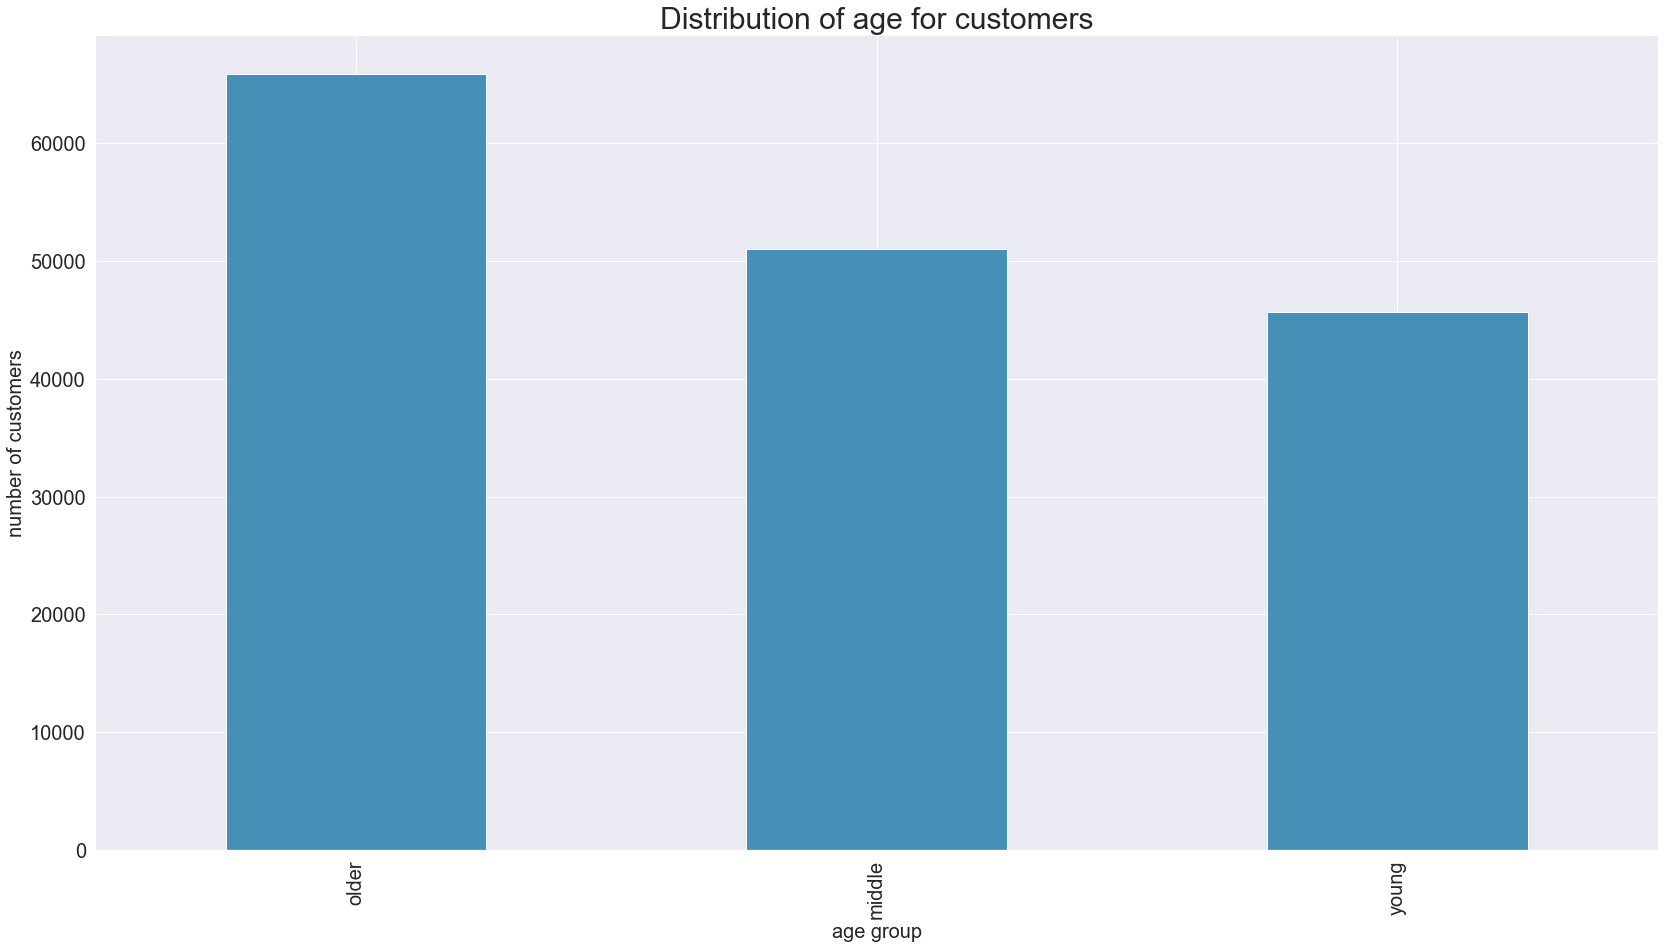

In [144]:
#Setting script figure size to 28,15
sns.set(rc = {'figure.figsize':(28,15)})
#Creating a bar chart for age distribution of customers
bar=df_unique['age_group'].value_counts().plot.bar(color='#4690b7', fontsize=20)
plt.title('Distribution of age for customers', fontsize=30)
plt.xlabel('age group', fontsize=20)
plt.ylabel('number of customers', fontsize=20)

## b. Income Profile distribution

Text(0, 0.5, 'number of customers')

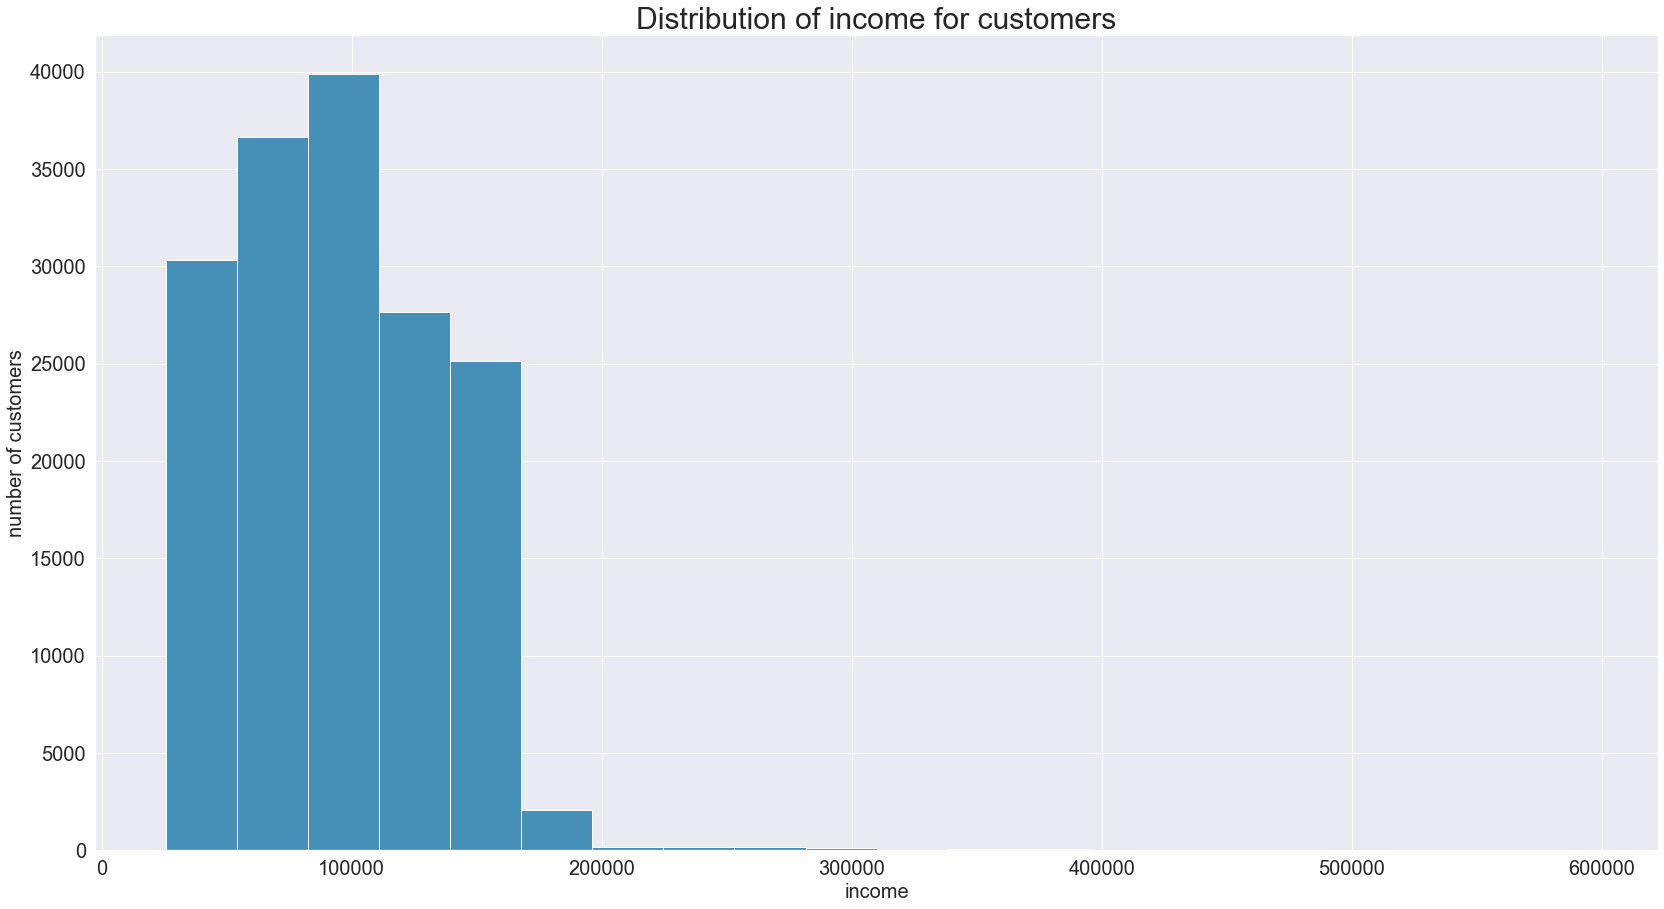

In [145]:
#Creating a histogram of customers' income
hist=df_unique['income'].plot.hist(bins=20, color='#4690b7', fontsize=20)
plt.title('Distribution of income for customers', fontsize=30)
plt.xlabel('income', fontsize=20)
plt.ylabel('number of customers', fontsize=20)

## c. Number of dependants Profile distribution

In [148]:
#Creating a crosstab for dependants and family status
dependent=pd.crosstab(df_unique['fam_status'], df_unique['dependant_group'])
dependent

dependant_group,has dependents,no dependents
fam_status,,
divorced/widowed,0,13831
living with parents and siblings,7608,0
married,114296,0
single,0,26896


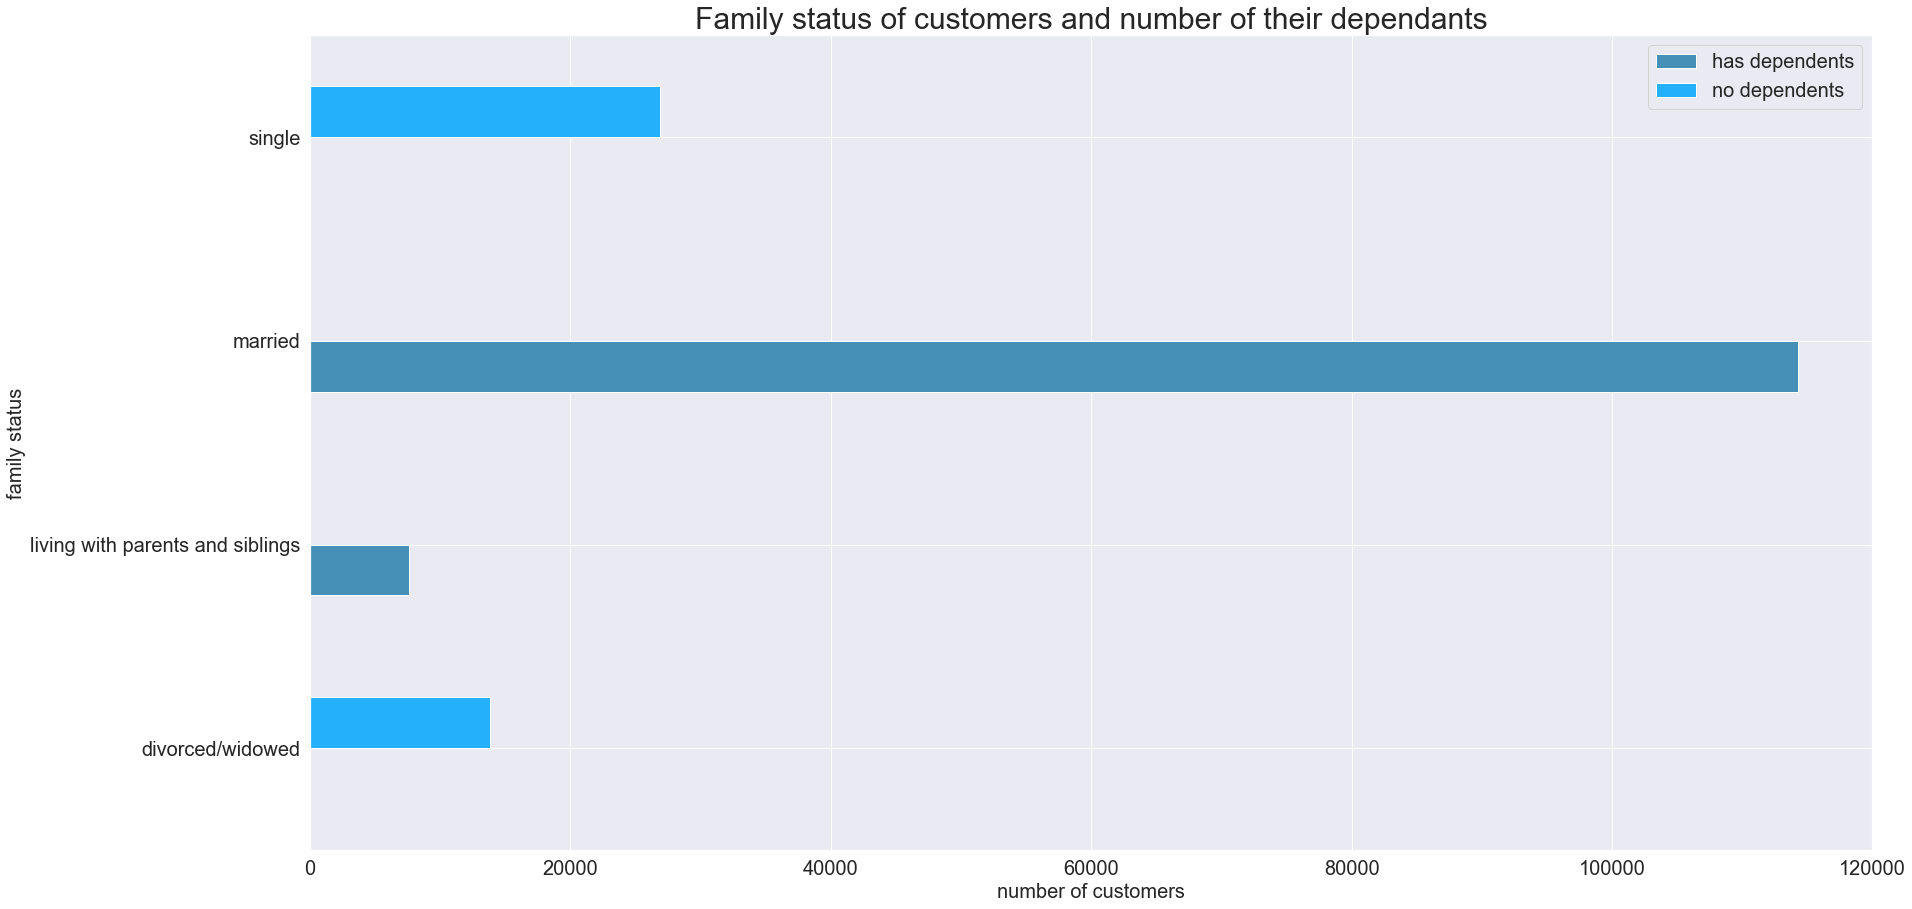

In [173]:
#Creating a bar chart for number of dependants
bar2=dependent.plot.barh(color=['#4690b7', '#24b0fa'], fontsize=20)
plt.title('Family status of customers and number of their dependants', fontsize=30)
plt.xlabel('number of customers', fontsize=20)
plt.ylabel('family status', fontsize=20)
plt.legend(fontsize=20)

## d. Baby stuff Profile distribution

In [169]:
#Creating a pie chart
pd.crosstab(df_unique['fam_status'], df_unique['baby_status'])

baby_status,0,1
fam_status,,
divorced/widowed,11209,2622
living with parents and siblings,6204,1404
married,93047,21249
single,21941,4955


#### We can notice here that even people who indicated that they don't have dependants have purchased baby stuff. They could have purchased it as a gift, so we can't make precise conclusion that if the customer purchased baby stuff, they have a baby.

In [218]:
df_unique['baby_status'].value_counts()

0    132401
1     30230
Name: baby_status, dtype: int64

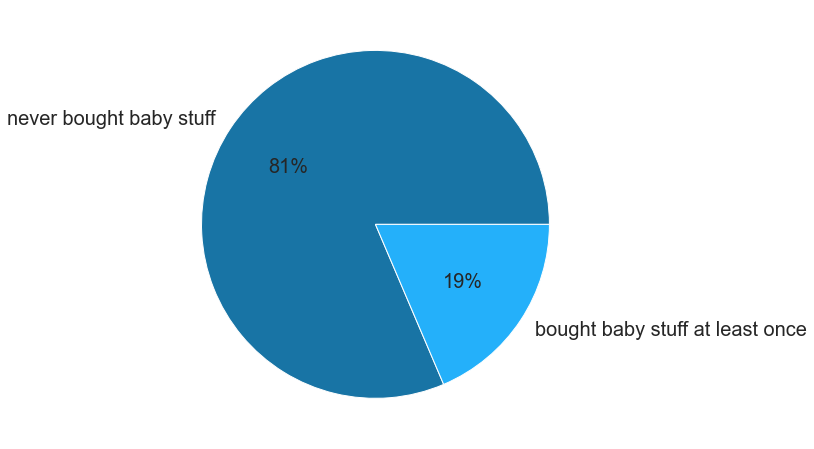

In [219]:
sns.set(rc = {'figure.figsize':(18,8)})
#Creating a pie chart for customers who have bought baby stuff at least once
baby_stuff=df_unique['baby_status'].value_counts()
pie=baby_stuff.plot.pie(label='', labels=['never bought baby stuff', 'bought baby stuff at least once'],autopct=('%1.f%%'), colors=['#8525be','#24b0fa'], textprops={'fontsize': 20})
pie

## e. Pet Profile distribution

In [184]:
df_unique['pet_status'].value_counts()

0    149456
1     13175
Name: pet_status, dtype: int64

<AxesSubplot:>

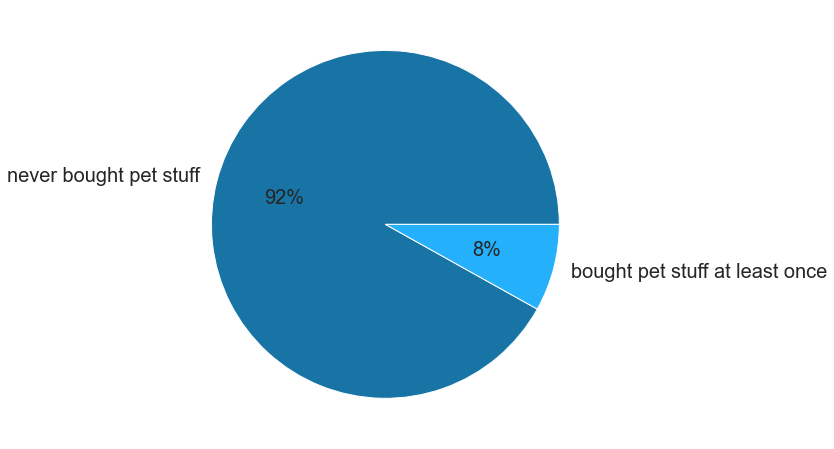

In [220]:
#Creating a pie chart for customers who have bought pet stuff at least once
pet_stuff=df_unique['pet_status'].value_counts()
pie2=pet_stuff.plot.pie(label='', labels=['never bought pet stuff', 'bought pet stuff at least once'],autopct=('%1.f%%'), colors=['#1874a5','#24b0fa'], textprops={'fontsize': 20})
pie2

## f. Vegetarian profile distribution

In [196]:
df_unique['vegan_status'].value_counts()

1    154996
0      7635
Name: vegan_status, dtype: int64

<AxesSubplot:>

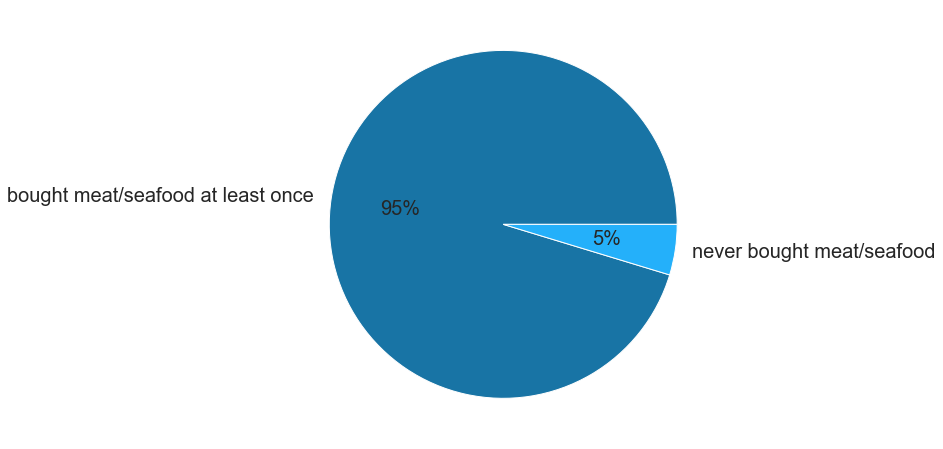

In [221]:
#Creating a pie chart for customers who have bought meat least once
vegan=df_unique['vegan_status'].value_counts()
pie3=vegan.plot.pie(label='',labels=['bought meat/seafood at least once', 'never bought meat/seafood'],autopct=('%1.f%%'), colors=['#1874a5','#24b0fa'], textprops={'fontsize': 20})
pie

## g. Alcohol drinker profile distribution

In [198]:
df_unique['alcohol_status'].value_counts()

0    149480
1     13151
Name: alcohol_status, dtype: int64

<AxesSubplot:>

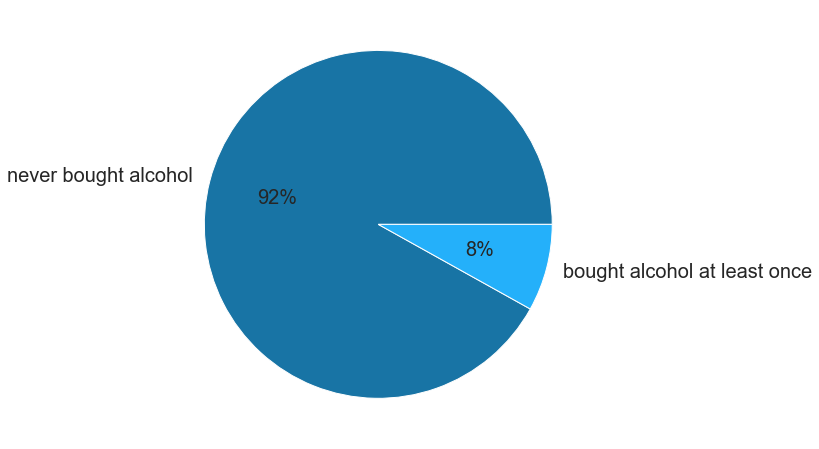

In [222]:
#Creating a pie chart for customers who have bought alcohol at least once
alcohol=df_unique['alcohol_status'].value_counts()
pie4=alcohol.plot.pie(label='', labels=['never bought alcohol', 'bought alcohol at least once'],autopct=('%1.f%%'), colors=['#1874a5','#24b0fa'], textprops={'fontsize': 20})
pie

# 9. Exporting visualizations

In [200]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_income_distribution.png'))
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants.png'))


In [223]:
pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_baby_stuff.png'))
pie2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_pet_stuff.png'))
pie3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_vegan.png'))
pie4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_alchol.png'))